In [0]:
from google.colab import drive

In [68]:
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [0]:
import os
os.chdir('/drive/My Drive/Machine Learning/Web Scraping')

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [0]:
column_names = ['Brand','CC','Engine Type','MPL','Model','Price','Seat Capacity','Transmission Type','Unnamed:8','Variant','Unnamed:10']

In [0]:
df = pd.read_csv('./WebScrapedData.csv')#names=column_names

In [73]:
df

,Unnamed: 0,Brand,CC,Engine Type,MPL,Model,Price,Seat Capacity,Transmission Type,Unnamed:8,Variant,Unnamed:10
0,0,Audi,1968,Diesel,20.38,A3,3491000.0,5,Automatic,NaN,35 TDI Premium Plus,NaN
1,1,Audi,1968,Diesel,20.38,A3,3669000.0,5,Automatic,NaN,35 TDI Technology,NaN
2,2,Audi,1395,Petrol,19.2,A3,3310000.0,5,Automatic,NaN,35 TFSI Premium Plus,NaN
3,3,Audi,1395,Petrol,19.2,A3,3510000.0,5,Automatic,NaN,35 TFSI Technology,NaN
4,4,Audi,1968,Diesel,15.73,Q3,3653000.0,5,Manual,NaN,30 TDI Premium FWD,NaN
5,5,Audi,1968,Diesel,15.73,Q3,3968000.0,5,Automatic,NaN,35 TDI quattro Premium Plus,NaN
6,6,Audi,1395,Petrol,16.9,Q3,3473000.0,5,Automatic,NaN,30 TFSI Premium,NaN
7,7,Audi,1968,Diesel,16.9,Q3,4076000.0,5,Automatic,NaN,2.0 TDI Design Edition,NaN
8,8,Audi,1968,Diesel,18.25,A4,4337000.0,5,Automatic,NaN,35 TDI Premium Plus,NaN
9,9,Audi,1395,Petrol,17.84,A4,4147000.0,5,Automatic,NaN,30 TFSI Premium Plus,NaN


In [74]:
df.keys()

Index(['Unnamed: 0', 'Brand', 'CC', 'Engine Type', 'MPL', 'Model', 'Price',
       'Seat Capacity', 'Transmission Type', 'Unnamed:8', 'Variant',
       'Unnamed:10'],
      dtype='object')

In [0]:
#df.to_csv('./WebScrapedData.csv')

In [76]:
df.columns

Index(['Unnamed: 0', 'Brand', 'CC', 'Engine Type', 'MPL', 'Model', 'Price',
       'Seat Capacity', 'Transmission Type', 'Unnamed:8', 'Variant',
       'Unnamed:10'],
      dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 12 columns):
Unnamed: 0           501 non-null int64
Brand                501 non-null object
CC                   501 non-null object
Engine Type          501 non-null object
MPL                  501 non-null object
Model                501 non-null object
Price                501 non-null float64
Seat Capacity        501 non-null int64
Transmission Type    501 non-null object
Unnamed:8            35 non-null float64
Variant              303 non-null object
Unnamed:10           198 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 47.0+ KB


In [78]:
df[['Variant','Unnamed:10']].isnull().sum()

Variant       198
Unnamed:10    303
dtype: int64

In [0]:
df1 = df.copy()

In [0]:
df1.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [0]:
#df1['Variants'] = df1['Variant'] + df1['Unnamed:10']

In [0]:
df1['Variant'].fillna(value='',inplace=True)

In [0]:
df1['Unnamed:10'].fillna(value='',inplace=True)

In [0]:
df1['Variants'] = df1['Variant'] + df1['Unnamed:10']

In [85]:
df1

,Brand,CC,Engine Type,MPL,Model,Price,Seat Capacity,Transmission Type,Unnamed:8,Variant,Unnamed:10,Variants
0,Audi,1968,Diesel,20.38,A3,3491000.0,5,Automatic,NaN,35 TDI Premium Plus,,35 TDI Premium Plus
1,Audi,1968,Diesel,20.38,A3,3669000.0,5,Automatic,NaN,35 TDI Technology,,35 TDI Technology
2,Audi,1395,Petrol,19.2,A3,3310000.0,5,Automatic,NaN,35 TFSI Premium Plus,,35 TFSI Premium Plus
3,Audi,1395,Petrol,19.2,A3,3510000.0,5,Automatic,NaN,35 TFSI Technology,,35 TFSI Technology
4,Audi,1968,Diesel,15.73,Q3,3653000.0,5,Manual,NaN,30 TDI Premium FWD,,30 TDI Premium FWD
5,Audi,1968,Diesel,15.73,Q3,3968000.0,5,Automatic,NaN,35 TDI quattro Premium Plus,,35 TDI quattro Premium Plus
6,Audi,1395,Petrol,16.9,Q3,3473000.0,5,Automatic,NaN,30 TFSI Premium,,30 TFSI Premium
7,Audi,1968,Diesel,16.9,Q3,4076000.0,5,Automatic,NaN,2.0 TDI Design Edition,,2.0 TDI Design Edition
8,Audi,1968,Diesel,18.25,A4,4337000.0,5,Automatic,NaN,35 TDI Premium Plus,,35 TDI Premium Plus
9,Audi,1395,Petrol,17.84,A4,4147000.0,5,Automatic,NaN,30 TFSI Premium Plus,,30 TFSI Premium Plus


In [0]:
#df1.drop(labels=['Variant','Unnamed:10'],inplace=True,axis=1)

In [0]:
df1.drop(columns=['Variant','Unnamed:10'],inplace=True)

In [88]:
df1['Unnamed:8'].isnull().sum()

466

In [0]:
df1.drop(columns=['Unnamed:8'],inplace=True)

In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 9 columns):
Brand                501 non-null object
CC                   501 non-null object
Engine Type          501 non-null object
MPL                  501 non-null object
Model                501 non-null object
Price                501 non-null float64
Seat Capacity        501 non-null int64
Transmission Type    501 non-null object
Variants             501 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


In [91]:
df1['Variants'].unique()

array(['35 TDI Premium Plus', '35 TDI Technology', '35 TFSI Premium Plus',
       '35 TFSI Technology', '30 TDI Premium FWD',
       '35 TDI quattro Premium Plus', '30 TFSI Premium',
       '2.0 TDI Design Edition', '30 TFSI Premium Plus',
       '30 TFSI Technology Pack', '35 TDI Technology Pack', '40 TFSI',
       '45 TFSI Premium Plus', '45 TFSI Technology', 'Sportback',
       '35 TDI Matrix', '35 TFSI Matrix', '45 TFSI', '2.0 TDI', '60 TFSI',
       '50 TDI', '60 TDI', 'W12', '50 TDI Plus',
       '                                D-Lite                        ',
       '                                D-Lite +                        ',
       '                                Era +                        ',
       '                                Magna +                        ',
       '                                Sportz                        ',
       '                                1.0 Kappa Magna (O) (opt)                        ',
       '                                

In [0]:
Variants = list(df1['Variants'])

In [0]:
#string1 = ['innomatics','research','labs']
#'==============='.join(string1)

In [0]:
Vari = []
for i in Variants:
    if '     ' not in i:
        Vari.append(i)
    elif '    ' in i:
        res = re.sub(r'\s+','',i)
        Vari.append(''.join(res))

In [95]:
Vari

['35 TDI Premium Plus',
 '35 TDI Technology',
 '35 TFSI Premium Plus',
 '35 TFSI Technology',
 '30 TDI Premium FWD',
 '35 TDI quattro Premium Plus',
 '30 TFSI Premium',
 '2.0 TDI Design Edition',
 '35 TDI Premium Plus',
 '30 TFSI Premium Plus',
 '30 TFSI Technology Pack',
 '35 TDI Technology Pack',
 '40 TFSI',
 '35 TDI Premium Plus',
 '35 TDI Technology',
 '45 TFSI Premium Plus',
 '45 TFSI Technology',
 'Sportback',
 '35 TDI Matrix',
 '35 TFSI Matrix',
 '45 TFSI',
 '2.0 TDI',
 '60 TFSI',
 '50 TDI',
 '60 TDI',
 'W12',
 '50 TDI Plus',
 'D-Lite',
 'D-Lite+',
 'Era+',
 'Magna+',
 'Sportz',
 '1.0KappaMagna(O)(opt)',
 'Magna+SportsEdition',
 '1.0KappaEra+',
 'Era+(O)',
 'Magna+(O)',
 'Era+SportsEdition',
 '1.6SMT',
 '1.6SXMT',
 '1.6SX(O)AT',
 '2.0SMT',
 '2.0SXMT',
 '2.0SXAT',
 '2.0SX(O)AT',
 '2.0SX(O)MT',
 '1.6SX(O)MT',
 '1.2KappaVTVTEra',
 '1.2KappaVTVTMagna',
 '1.2CRDiEra',
 '1.2CRDiMagna',
 '1.2CRDiSportz',
 '1.2KappaVTVTAsta',
 '1.2CRDiAsta',
 '1.2KappaVTVTSportz',
 '1.2KappaVTVTMagnaAT'

In [0]:
df1.drop(columns='Variants',inplace=True)

In [0]:
df1['Variant'] = Vari

In [98]:
df1.head(2)

,Brand,CC,Engine Type,MPL,Model,Price,Seat Capacity,Transmission Type,Variant
0,Audi,1968,Diesel,20.38,A3,3491000.0,5,Automatic,35 TDI Premium Plus
1,Audi,1968,Diesel,20.38,A3,3669000.0,5,Automatic,35 TDI Technology


In [99]:
df1['CC'].unique()

array(['1968', '1395', '1798', '1984', '3993', '2967', '4134', '6299',
       '814 cc', '998 cc', '1582 cc', '1999 cc', '1797 cc', '1197 cc',
       '1186 cc', '1995 cc', '1999', '1997', '2993', '5000', '1197',
       '1248', '796', '998', '1196', '1462', '1373', '1298', '1595 cc',
       '2143 cc', '1991 cc', '2987 cc', '5461 cc', '2996 cc', '1198 cc',
       '1498 cc', '1461 cc', '1598 cc', '3799 cc', '1598', '1498', '624',
       '1199', '1047', '1193', '1198', '2956', '2179', '1496 cc',
       '1798 cc', '1364 cc', '4461 cc', '2982 cc', '2393 cc', '2755 cc',
       '2694 cc', '2494 cc', '1968 cc', '999 cc'], dtype=object)

In [0]:
CC1 = list(df1['CC'])

In [0]:
CC = []
for i in CC1:
  if 'cc' not in i:
    CC.append(i)
  elif 'cc' in i:
    CC.append(i.split()[0])

In [102]:
CC

['1968',
 '1968',
 '1395',
 '1395',
 '1968',
 '1968',
 '1395',
 '1968',
 '1968',
 '1395',
 '1395',
 '1968',
 '1798',
 '1968',
 '1968',
 '1984',
 '1984',
 '1968',
 '1968',
 '1798',
 '1984',
 '1968',
 '3993',
 '2967',
 '4134',
 '6299',
 '2967',
 '814',
 '814',
 '814',
 '814',
 '814',
 '998',
 '814',
 '998',
 '814',
 '814',
 '814',
 '1582',
 '1582',
 '1582',
 '1999',
 '1999',
 '1797',
 '1999',
 '1999',
 '1582',
 '1197',
 '1197',
 '1186',
 '1186',
 '1186',
 '1197',
 '1186',
 '1197',
 '1197',
 '1197',
 '1197',
 '1186',
 '1995',
 '1999',
 '1995',
 '1999',
 '1995',
 '1999',
 '1999',
 '1999',
 '1999',
 '1997',
 '1997',
 '2993',
 '2993',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '1999',
 '5000',
 '1997',
 '1997',
 '1997',
 '1997',
 '1197',
 '1197',
 '1197',
 '1197',
 '1197',
 '1197',
 '1248',
 '1248',
 '1248',
 '1248',
 '1248',
 '1248',
 '1197',
 '1248',
 '1197',
 '1248',
 '796',
 '796',
 '796',
 '796',
 '796',
 '796',
 '796',
 '796',
 '998',
 '998',
 '998',
 '998',
 '998'

In [0]:
df1.drop(columns='CC',inplace=True)

In [104]:
df1.head(2)

,Brand,Engine Type,MPL,Model,Price,Seat Capacity,Transmission Type,Variant
0,Audi,Diesel,20.38,A3,3491000.0,5,Automatic,35 TDI Premium Plus
1,Audi,Diesel,20.38,A3,3669000.0,5,Automatic,35 TDI Technology


In [0]:
df1['CC'] = CC

In [106]:
df1.head(2)

,Brand,Engine Type,MPL,Model,Price,Seat Capacity,Transmission Type,Variant,CC
0,Audi,Diesel,20.38,A3,3491000.0,5,Automatic,35 TDI Premium Plus,1968
1,Audi,Diesel,20.38,A3,3669000.0,5,Automatic,35 TDI Technology,1968


In [107]:
df1.MPL.unique()

array(['20.38', '19.2', '15.73', '16.9', '18.25', '17.84', '16.55',
       '16.6', '12.44', '18.53', '15.26', '14.33', '17.2', '9.4', '16.77',
       '9.5', '15.7', '21.1', '20.3', '21.9', '21.7', '14.6', '16.3',
       '19.7', '18.9', '24.9', '17.4', '18.4', '13.0', '12.9', '19.3',
       '10.8', '14.47', '9.43', '21.27', '13.6', '13.5', '12.5', '15.38',
       '20.4', '25.2', '23.7', '33.4', '24.7', '23.1', '31.7', '16.8',
       '24.0', '32.2', '15.0', '20.0', '28.09', '21.56', '20.28', '17.5',
       '22.8', '24.52', '17.03', '22.0', '28.4', '20.51', '26.6', '23.65',
       '24.3', '11.9', '27.39', '21.4', '21.04', '20.89', '14.81', '12.0',
       '14.2', '8.5', '11.6', '9.2', '19.4', '22.7', '17.9', '19', '13.2',
       '23', 'Nissan Sunny', '15.4', '14.8', '16.7', '21.0', '15.1',
       '19.5', '14.12', '14.67', '13.7', '18.19', '23.6', '23.84',
       '27.28', '17.57', '22.95', '20.65', '21.58', '17.88', '23.97',
       '15.3', '14.4', '13.9', '17.1', '17.8', '23.9', '23.5', '9.

In [0]:
df1['MPL'].replace('Nissan Sunny',np.nan,inplace=True)

In [109]:
df1.MPL.unique()

array(['20.38', '19.2', '15.73', '16.9', '18.25', '17.84', '16.55',
       '16.6', '12.44', '18.53', '15.26', '14.33', '17.2', '9.4', '16.77',
       '9.5', '15.7', '21.1', '20.3', '21.9', '21.7', '14.6', '16.3',
       '19.7', '18.9', '24.9', '17.4', '18.4', '13.0', '12.9', '19.3',
       '10.8', '14.47', '9.43', '21.27', '13.6', '13.5', '12.5', '15.38',
       '20.4', '25.2', '23.7', '33.4', '24.7', '23.1', '31.7', '16.8',
       '24.0', '32.2', '15.0', '20.0', '28.09', '21.56', '20.28', '17.5',
       '22.8', '24.52', '17.03', '22.0', '28.4', '20.51', '26.6', '23.65',
       '24.3', '11.9', '27.39', '21.4', '21.04', '20.89', '14.81', '12.0',
       '14.2', '8.5', '11.6', '9.2', '19.4', '22.7', '17.9', '19', '13.2',
       '23', nan, '15.4', '14.8', '16.7', '21.0', '15.1', '19.5', '14.12',
       '14.67', '13.7', '18.19', '23.6', '23.84', '27.28', '17.57',
       '22.95', '20.65', '21.58', '17.88', '23.97', '15.3', '14.4',
       '13.9', '17.1', '17.8', '23.9', '23.5', '9.0', '11.1',

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 9 columns):
Brand                501 non-null object
Engine Type          501 non-null object
MPL                  500 non-null object
Model                501 non-null object
Price                501 non-null float64
Seat Capacity        501 non-null int64
Transmission Type    501 non-null object
Variant              501 non-null object
CC                   501 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


In [0]:
df1[['MPL','CC']] = df1[['MPL','CC']].apply(pd.to_numeric)

In [112]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 9 columns):
Brand                501 non-null object
Engine Type          501 non-null object
MPL                  500 non-null float64
Model                501 non-null object
Price                501 non-null float64
Seat Capacity        501 non-null int64
Transmission Type    501 non-null object
Variant              501 non-null object
CC                   501 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 35.3+ KB


In [113]:
df1.MPL.unique()

array([20.38, 19.2 , 15.73, 16.9 , 18.25, 17.84, 16.55, 16.6 , 12.44,
       18.53, 15.26, 14.33, 17.2 ,  9.4 , 16.77,  9.5 , 15.7 , 21.1 ,
       20.3 , 21.9 , 21.7 , 14.6 , 16.3 , 19.7 , 18.9 , 24.9 , 17.4 ,
       18.4 , 13.  , 12.9 , 19.3 , 10.8 , 14.47,  9.43, 21.27, 13.6 ,
       13.5 , 12.5 , 15.38, 20.4 , 25.2 , 23.7 , 33.4 , 24.7 , 23.1 ,
       31.7 , 16.8 , 24.  , 32.2 , 15.  , 20.  , 28.09, 21.56, 20.28,
       17.5 , 22.8 , 24.52, 17.03, 22.  , 28.4 , 20.51, 26.6 , 23.65,
       24.3 , 11.9 , 27.39, 21.4 , 21.04, 20.89, 14.81, 12.  , 14.2 ,
        8.5 , 11.6 ,  9.2 , 19.4 , 22.7 , 17.9 , 19.  , 13.2 , 23.  ,
         nan, 15.4 , 14.8 , 16.7 , 21.  , 15.1 , 19.5 , 14.12, 14.67,
       13.7 , 18.19, 23.6 , 23.84, 27.28, 17.57, 22.95, 20.65, 21.58,
       17.88, 23.97, 15.3 , 14.4 , 13.9 , 17.1 , 17.8 , 23.9 , 23.5 ,
        9.  , 11.1 , 14.29, 10.83, 10.75, 11.25, 10.2 , 10.  , 17.7 ,
       18.1 , 19.1 , 20.6 , 21.5 , 16.  , 17.  , 18.7 , 20.1 ])

In [0]:
Brand_group = df1.groupby(by='Brand')

In [115]:
Brand_group.MPL.describe()

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
Audi,27.0,16.358148,2.803712,9.40,15.715,16.770,18.0450,20.38
Hyundai,38.0,19.452632,3.517964,12.90,16.575,20.300,21.1000,24.90
Jaguar,20.0,14.593000,3.186272,9.43,13.250,14.035,15.3800,21.27
Maruthi Suzuki,149.0,22.861141,3.560416,11.90,20.510,23.100,24.5200,33.40
Mercedes,14.0,12.637143,2.115854,8.50,11.700,12.000,14.6575,15.00
Nissan,21.0,19.809524,2.479900,13.20,18.900,19.300,22.7000,23.00
Skoda,35.0,17.678571,2.877967,13.70,15.100,16.700,21.0500,21.70
Tata,92.0,20.692065,4.260491,13.90,17.570,20.650,23.8400,27.28
Toyota,72.0,17.185000,4.290154,9.00,14.290,16.900,19.5750,23.90


In [0]:
Brand_group.MPL.mean()

In [0]:
Nissan_mean = Brand_group.MPL.mean()['Nissan']

In [118]:
Nissan_mean

19.80952380952381

In [0]:
df1.fillna(value=Nissan_mean,inplace=True)

In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 9 columns):
Brand                501 non-null object
Engine Type          501 non-null object
MPL                  501 non-null float64
Model                501 non-null object
Price                501 non-null float64
Seat Capacity        501 non-null int64
Transmission Type    501 non-null object
Variant              501 non-null object
CC                   501 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 35.3+ KB


In [0]:
#df1.dropna(inplace=True)

In [0]:
#df1.info()

In [121]:
df1.Brand.unique()

array(['Audi', 'Hyundai', 'Jaguar', 'Maruthi Suzuki', 'Mercedes',
       'Nissan', 'Skoda', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)

In [0]:
df1['Engine Type'].unique()

In [0]:
df1['Engine Type'].replace(' Diesel','Diesel',inplace=True)

In [0]:
df1['Engine Type'].unique()

In [0]:
df1['Engine Type'].replace(' Petrol','Petrol',inplace=True)

In [0]:
df1['Engine Type'].unique()

In [127]:
df1['MPL'].unique()

array([20.38      , 19.2       , 15.73      , 16.9       , 18.25      ,
       17.84      , 16.55      , 16.6       , 12.44      , 18.53      ,
       15.26      , 14.33      , 17.2       ,  9.4       , 16.77      ,
        9.5       , 15.7       , 21.1       , 20.3       , 21.9       ,
       21.7       , 14.6       , 16.3       , 19.7       , 18.9       ,
       24.9       , 17.4       , 18.4       , 13.        , 12.9       ,
       19.3       , 10.8       , 14.47      ,  9.43      , 21.27      ,
       13.6       , 13.5       , 12.5       , 15.38      , 20.4       ,
       25.2       , 23.7       , 33.4       , 24.7       , 23.1       ,
       31.7       , 16.8       , 24.        , 32.2       , 15.        ,
       20.        , 28.09      , 21.56      , 20.28      , 17.5       ,
       22.8       , 24.52      , 17.03      , 22.        , 28.4       ,
       20.51      , 26.6       , 23.65      , 24.3       , 11.9       ,
       27.39      , 21.4       , 21.04      , 20.89      , 14.81

In [128]:
df1['Model'].unique()

array(['A3', 'Q3', 'A4', 'A3 Cabriolet', 'Q5', 'A5', 'A6', 'TT',
       'A5 Cabriolet', 'A8L', 'Hyundai Eon', 'Hyundai Elantra',
       'Hyundai Grand i10', 'Hyundai Tucson', 'Jaguar XF', 'Jaguar XJ',
       'Jaguar F-Pace', 'Jaguar XE', 'Jaguar F Type', 'Swift', 'Alto 800',
       'Celerio', 'Omni', 'Alto 800 Tour', 'Alto K10', 'Eeco', 'Ciaz',
       'Ertiga', 'Dzire', 'Wagon R', 'S-Cross', 'Vitara Breeza',
       'Celerio X', 'Gypsy', 'Baleno', 'Ignis', 'B-Class', 'E-Class',
       'GLS', 'CLS', 'Nissan Micra Active', 'Nissan Sunny',
       'Nissan Terrano', 'Nissan Micra', 'Rapid', 'Octavia', 'Superb',
       'Kodiaq', 'Nano', 'Tiago', 'Bolt', 'Tigor', 'Zest', 'Nexon',
       'Sumo', 'Hexa', 'Safari', 'Toyota Yaris', 'Toyota Prius',
       'Toyota Platinum Etios', 'Toyota Land Cruiser',
       'Toyota Land Cruiser Prado', 'Toyota Innova Crysta',
       'Toyota Fortuner', 'Toyota Etios Cross', 'Toyota Corolla Altis',
       'Toyota Etios Liva', 'Toyota Camry', 'Volkswagen Vento',
   

In [129]:
df1['Price'].unique()

array([ 3491000.,  3669000.,  3310000.,  3510000.,  3653000.,  3968000.,
        3473000.,  4076000.,  4337000.,  4147000.,  4505000.,  4694000.,
        4486219.,  5527000.,  5979000.,  5540000.,  5669000.,  5588000.,
        6543000.,  6924000., 14945000., 11766000., 14334000., 20353000.,
       12275000.,   332900.,   369698.,   383562.,   414855.,   442798.,
         466432.,   421748.,   432570.,   393461.,   424754.,   399801.,
        1499957.,  1658435.,  1968614.,  1369000.,  1516301.,  1629344.,
        1855388.,  1700359.,  1804196.,   473900.,   548100.,   589900.,
         645100.,   702600.,   650300.,   747300.,   599915.,   628000.,
         693800.,   628800.,   727500.,  1863975.,  1829900.,  2304000.,
        2129900.,  2574000.,  2254900.,  4958000.,  5476000.,  6141000.,
        5325000.,  6075000.,  9901000., 11000000., 10100000.,  6357000.,
        6317000.,  4047000.,  4475000.,  4700000.,  3973000.,  4404000.,
       22200000., 10400000.,  9093000.,  9367000., 

In [130]:
df1['Seat Capacity'].unique()

array([5, 4, 7, 8, 6])

In [132]:
df1['Transmission Type'].unique()

array(['Automatic', 'Manual', ' Automatic'], dtype=object)

In [0]:
df1['Transmission Type'].replace(' Automatic','Automatic',inplace=True)

In [134]:
df1['Transmission Type'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [0]:
df1['Variant'].unique()

In [0]:
df1['CC'].unique()

In [137]:
df1

,Brand,Engine Type,MPL,Model,Price,Seat Capacity,Transmission Type,Variant,CC
0,Audi,Diesel,20.38,A3,3491000.0,5,Automatic,35 TDI Premium Plus,1968
1,Audi,Diesel,20.38,A3,3669000.0,5,Automatic,35 TDI Technology,1968
2,Audi,Petrol,19.20,A3,3310000.0,5,Automatic,35 TFSI Premium Plus,1395
3,Audi,Petrol,19.20,A3,3510000.0,5,Automatic,35 TFSI Technology,1395
4,Audi,Diesel,15.73,Q3,3653000.0,5,Manual,30 TDI Premium FWD,1968
5,Audi,Diesel,15.73,Q3,3968000.0,5,Automatic,35 TDI quattro Premium Plus,1968
6,Audi,Petrol,16.90,Q3,3473000.0,5,Automatic,30 TFSI Premium,1395
7,Audi,Diesel,16.90,Q3,4076000.0,5,Automatic,2.0 TDI Design Edition,1968
8,Audi,Diesel,18.25,A4,4337000.0,5,Automatic,35 TDI Premium Plus,1968
9,Audi,Petrol,17.84,A4,4147000.0,5,Automatic,30 TFSI Premium Plus,1395


# Data Analysis

In [0]:
df1.describe()

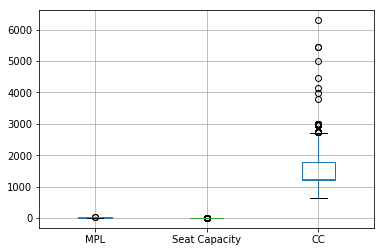

In [141]:
df1[['MPL','Seat Capacity','CC']].boxplot()
plt.show()

In [0]:
df1[['MPL','Seat Capacity']].boxplot()
plt.ylim(0,40)
plt.show()

In [0]:
plt.figure(figsize=(15,5))
sns.distplot(df1['Price'])
plt.xlim(0,10000000)
plt.show()


- Deviates from normal distribution
- Have appreciable positive skewness
- Show peakedness

- We shall see some peakedness and skewness of the data

In [148]:
print("Skewness = {}".format(df1['Price'].skew()))
print("Kurtosis = {}".format(df1['Price'].kurt()))

Skewness = 4.08623385912624
Kurtosis = 20.277074701362018


In [0]:
plt.figure(figsize=(15,2))
sns.catplot(x='CC',y='Price',data=df1)
plt.show()

In [0]:
plt.figure(figsize=(15,2))
sns.catplot(x='MPL',y='Price',data=df1,)
plt.show()

In [0]:
plt.figure(figsize=(15,2))
sns.catplot(x='Seat Capacity',y='Price',data=df1)
plt.show()

In [0]:
plt.figure(figsize=(15,2))
sns.catplot(x='Transmission Type',y='Price',data=df1,hue='Seat Capacity')
plt.show()

In [0]:
plt.figure(figsize=(15,2))
sns.catplot(x='Engine Type',y='Price',data=df1,hue='Brand')
plt.show()

In [0]:
plt.figure(figsize=(30,2))
sns.catplot(x='Brand',y='Price',data=df1)
plt.show()

**Relationship with numerical variables**

In [0]:
plt.figure(figsize=(2,2))
sns.barplot(df1['Transmission Type'],df1['Price'])
plt.show()

In [149]:
df1.corr()

,MPL,Price,Seat Capacity,CC
MPL,1.000000,-0.456930,-0.306482,-0.643906
Price,-0.456930,1.000000,0.234509,0.793407
Seat Capacity,-0.306482,0.234509,1.000000,0.350840
CC,-0.643906,0.793407,0.350840,1.000000


<Figure size 360x360 with 0 Axes>

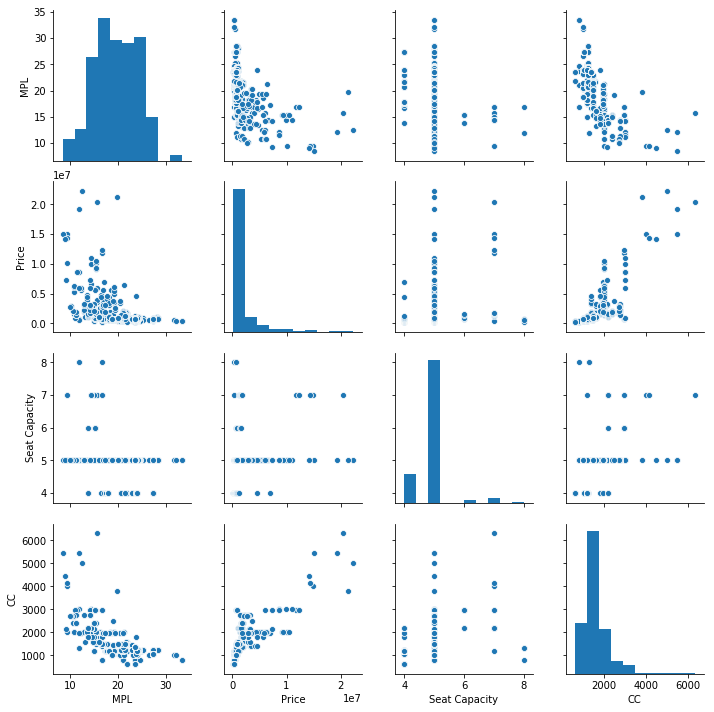

<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure(figsize=(5,5))
sns.pairplot(df1)
plt.show()
plt.savefig('./correlation.jpg')

In [0]:
Brand_group = df1.groupby(by='Brand')

In [0]:
Brand_group.describe()

MPL                       ...      CC                 
                count       mean       std  ...     50%      75%     max
Brand                                       ...                         
Audi             27.0  16.358148  2.803712  ...  1968.0  1984.00  6299.0
Hyundai          38.0  19.452632  3.517964  ...  1197.0  1945.50  1999.0
Jaguar           20.0  14.593000  3.186272  ...  1999.0  1999.00  5000.0
Maruthi Suzuki  149.0  22.861141  3.560416  ...  1197.0  1248.00  1462.0
Mercedes         14.0  12.637143  2.115854  ...  2987.0  2993.75  5461.0
Nissan           22.0  19.809524  2.420135  ...  1461.0  1461.00  3799.0
Skoda            35.0  17.678571  2.877967  ...  1598.0  1883.00  1984.0
Tata             92.0  20.692065  4.260491  ...  1198.0  1248.00  2956.0
Toyota           72.0  17.185000  4.290154  ...  1496.0  2418.25  4461.0
Volkswagen       32.0  18.921875  1.718164  ...  1498.0  1523.00  1968.0

[10 rows x 32 columns]

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 9 columns):
Brand                501 non-null object
Engine Type          501 non-null object
MPL                  501 non-null float64
Model                501 non-null object
Price                501 non-null float64
Seat Capacity        501 non-null int64
Transmission Type    501 non-null object
Variant              501 non-null object
CC                   501 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 35.3+ KB


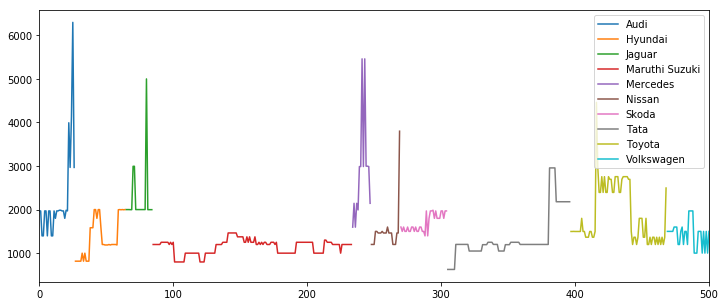

In [0]:
plt.figure(figsize=(12,5))
Brand_group['CC'].plot()
plt.legend()
plt.show()

# Categorical Variables

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 9 columns):
Brand                501 non-null object
Engine Type          501 non-null object
MPL                  501 non-null float64
Model                501 non-null object
Price                501 non-null float64
Seat Capacity        501 non-null int64
Transmission Type    501 non-null object
Variant              501 non-null object
CC                   501 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 35.3+ KB


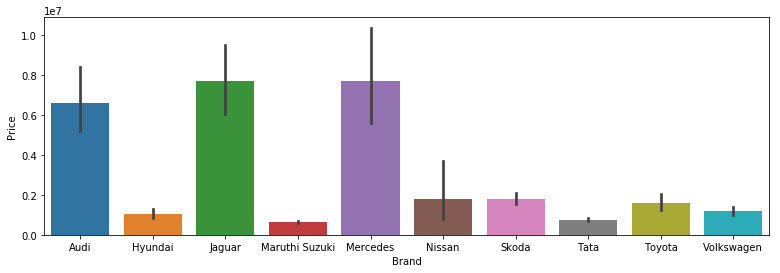

In [0]:
plt.figure(figsize=(13,4))
sns.barplot(df1['Brand'],df1['Price'])
plt.show()

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 9 columns):
Brand                501 non-null object
Engine Type          501 non-null object
MPL                  501 non-null float64
Model                501 non-null object
Price                501 non-null float64
Seat Capacity        501 non-null int64
Transmission Type    501 non-null object
Variant              501 non-null object
CC                   501 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 35.3+ KB


<h1 align = 'center'>Simple Linear Regression</h1>

<h4 align='center'> Linear Regression tells about the relationship between two variables (Simple Linear Regression) or more variables (Multiple Linear Regression). A single variable or multiple variables represent one dependent or target variable and one or more independent variables that effects the target variable. </h4>

In [0]:
# Example
A = [1,2,3,4,5,6]
B = [6,5,4,3,2,1]
C = [1,2,3,4,5,6]

In [0]:
df = pd.DataFrame()

In [0]:
df['A']=A
df['B']=B
df['C']=C

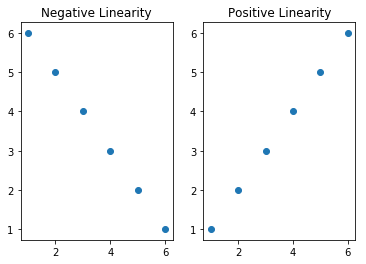

In [0]:
plt.subplot(1,2,1)
plt.scatter(A,B)
plt.title("Negative Linearity")
plt.subplot(1,2,2)
plt.scatter(A,C)
plt.title("Positive Linearity")
plt.show()

<h4 align='center'>Above results states that the in Negative Linearity as the independent variable goes up the dependent variable decreases.
The relation between any two variables is represented by the equation</h4>
<h2 align='center'>$y = mx + c$</h2>
<ol>
  <li>y --> Dependent Variable ---- Target Variable</li>
  <li>x --> Independent Variable ---- Variable used for making predictions</li>
  <li>m--> Slope of the line</li>
  <li>c --> Bias/ Y- Intercept
</ol>

<h4> The Slope and Intercept values can be interpreted from the independent and dependent variables</h4>
<ol>
  <li>
    $m =\frac{\sum(x-\bar x)(y-\bar y)}{(x-\bar x)^2}$ 
  </li>
  <li>
    $c = y - mx$
</ol>

<h4> We can draw 'n' number of lines but we need to find a line which fits best i.e. the distance between each data point to the predicted line must be maintained low and this can be calculated using a cost function.</h4>
<h4> Cost Function </h4>
<ul> 
  <li>
    $m =\frac{\sum(y-\bar y)^2}{2}$ 
  </li>
</ul> 
<h4>We always needs to reduce the cost function</h4>
<h4>Considering an example we shall build a linear model and find predicted values</h4>

In [0]:
Cars = pd.read_csv('./cars.csv')
Cars.head(2)

FileNotFoundError: ignored

In [0]:
X = Cars[['speed']]
Y = Cars[['dist']]

<h3 align='center'> As it is <i>Simple Linear Regression</i> we cosidered only two variables from the mother dataframe.</h3>
<h4 align ='center'> Using Sklearn libraries we now split the data into train and test </h4>

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [0]:
import statsmodels.api as sm

In [0]:
model = sm.OLS(Y,X).fit()

In [0]:
predicted = model.predict(X_test)

In [0]:
# Covariance
Cars.cov()

In [0]:
# Correlation Coefficient
Cars.corr()

In [0]:
!pip install lmdiag

In [0]:
import lmdiag
#plt.figure(figsize=(12,8))
#lmdiag.plot(model)

In [0]:
sns.distplot(model.resid)

In [0]:
from scipy.stats import shapiro
shapiro(model.resid)

- significance p < 5% - reject null -- Not in Normal Distribution
- p > 5% - reject alternatio -- It is in Normal Distribution
- As the value is less than 0.05 we can cosider this as a good model